In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

### 1. Answer with the type of test you would use (assume normal distribution):


#### Is there a difference in grades of students on the second floor compared to grades of all students?

In [2]:
# 1 sample: students on the second floor compared to ALL students
# Looking for the difference, not if the means are greater or less
# than so we have a two_tailed test

# stats.ttest_1samp(a, popmean)

# a being the array of numerical values of your sample
# popmean being the mean of the total population 

In [3]:
stats.ttest_1samp?

#### Are adults who drink milk taller than adults who dont drink milk?

In [4]:
# 2 samples: adults who drink milk vs adults who do not drink milk
# We are looking to see if the mean height of adults who drink 
# milk is greater than the mean height of adults who do not
# This is a one-tailed test

# stats.ttest_ind(a_smaller, a_larger, equal_var=True) 

# a_smaller being the array that holds the heights of adults
# who do not drink milk
# a_larger being the array that holds the heights of adults 
# who do drink milk

#### Is the the price of gas higher in texas or in new mexico?

In [5]:
# 2 samples: gas prices in TX vs gas prices in NM
# We are looking to see if the gas prices are greater in one state 
# over the other
# This is a one_tailed test

# stats.ttest_ind(a_smaller, a_larger, equal_var=True)

# a_smaller being the array which holds TX gas prices
# a_larger being the array which holds NM gas prices


In [6]:
stats.ttest_ind?

#### Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [7]:
# 3 samples: ANOVA test type

# stats.f_oneway(data_science_array, web_dev_array, cloud_array)

In [8]:
stats.f_oneway?

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [9]:
# 2 samples independent of each other: 
# office_1 with 40 samples, a mean of 90 days and a std of 15
# office_2 with 50 samples, a mean of 100 days and a std of 20

# We are looking if the two means are different so this is 
# a one_tailed test

# Remember, for a two-tailed test: p < α IOT reject Ho 

In [10]:
μ1 = 90
σ1 = 15
sample_size1 = 40

office_1_dis = np.random.normal(μ1, σ1, size=sample_size1,).astype(int)

In [11]:
μ2 = 100
σ2 = 20
sample_size2 = 50

office_2_dis = np.random.normal(μ2, σ2, size=sample_size2).astype(int)

In [12]:
office_1_dis

array([ 93,  85,  96,  71, 109,  82,  86,  89,  58,  82,  81,  83, 103,
       122, 104,  76,  82,  76,  85,  81,  92,  92, 128, 138,  75,  73,
        86, 102, 109,  99, 103, 109, 111,  79,  92,  96,  90,  67,  97,
        98])

In [13]:
# STEP 1: Plot the Samples in Histograms

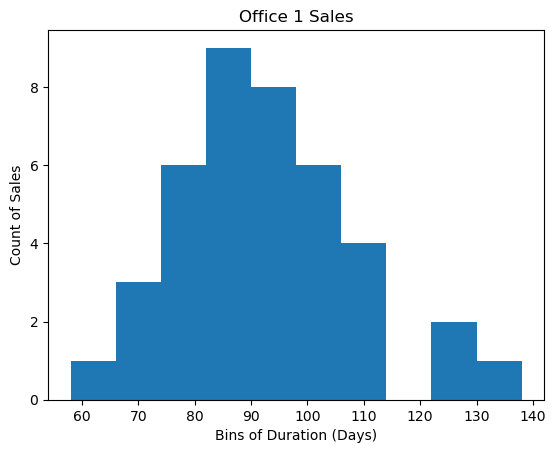

In [14]:
plt.hist(office_1_dis)
plt.xlabel('Bins of Duration (Days)')
plt.ylabel('Count of Sales')
plt.title('Office 1 Sales')
plt.show()

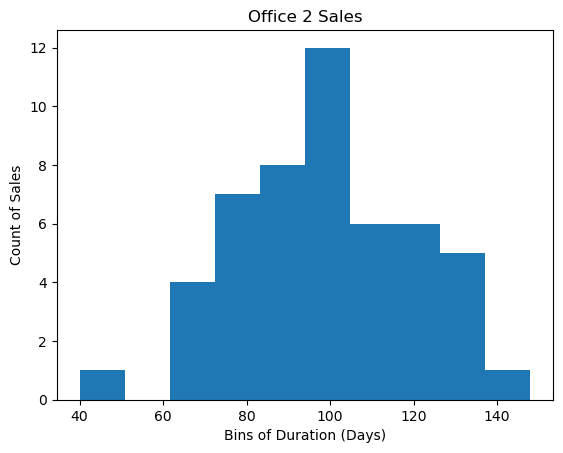

In [15]:
plt.hist(office_2_dis)
plt.xlabel('Bins of Duration (Days)')
plt.ylabel('Count of Sales')
plt.title('Office 2 Sales')
plt.show()

In [16]:
# STEP 2: Set Hypotheses

# Ho: The average time it takes to sell a home is not different
# between office 1 and office 2.

# Ha: The average time it takes to sell a home is different between
# office 1 and office 2.

In [17]:
# STEP 3: Set the alpha

α = 0.05

In [18]:
# STEP 4: Verify assumptions

# Independent: YES!

# Normality: at least 30 observations, YES!

# Variance: Lets check!

In [19]:
sub_α = 0.05

# sub_Ho: sales between offices 1 and 2 have equal variance.
# sub_Ha: sales between offices 1 and 2 have inequal variance.

In [20]:
stat, sub_p = stats.levene(office_1_dis, office_2_dis)

In [21]:
sub_p < α

# the levene p is less than alpha so we cannot reject the Ho
# We can say now that the two distributions have equal variance

# Variance: YES!

# and can therefore move on to our t-test

False

In [22]:
# STEP 5: Compute Test Statistic

t_stat, p_val = stats.ttest_ind(office_1_dis, 
                                office_2_dis,
                                equal_var=True)

In [23]:
t_stat

-1.62960325559871

In [24]:
p_val

0.10675997769970573

In [25]:
# STEP 6: Decide

# Two-tailed so we must check that p < alpha = we can reject the Ho

In [26]:
p_val < α

False

In [27]:
# Because the p_value is less than alpha, we must reject the
# Null Hypothesis

# Ha: The average time it takes to sell a home IS different between
# office 1 and office 2.

## ORRRRR

Text(0.5, 1.0, 'Sales in Offices 1 and 2')

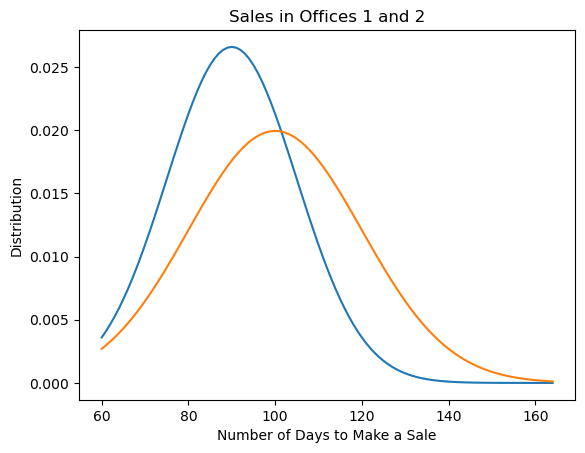

In [28]:
x = np.arange(60, 165)
y = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.xlabel('Number of Days to Make a Sale')
plt.ylabel('Distribution')
plt.title('Sales in Offices 1 and 2')

In [29]:
# Set Hypotheses

# Ho: There is NOT a difference in the sales time between office 1 and 2

# Ha: There is a difference in the sales time between office 1 and 2

In [30]:
# we have a two-tailed, two sample test

In [31]:
μ1 = 90
σ1 = 15
sample_size1 = 40

μ2 = 100
σ2 = 20
sample_size2 = 50

In [32]:
t_stat, p_val = stats.ttest_ind_from_stats(mean1 = μ1,
                           std1 = σ1,
                           nobs1 = 40,
                           mean2 = μ2,
                           std2 = σ2,
                           nobs2 = 50)

In [33]:
α = 0.05

In [34]:
p_val < α

True

In [35]:
# If the p value is less than alpha, we can reject the null
# hypothesis

In [36]:
if p_val < α:
    print('We can reject the Null Hypothesis, and we can conclude that the average time it takes to sell a home is different between office 1 and office 2.')
else:
    print('We cannot reject the Null Hypothesis.')

We can reject the Null Hypothesis, and we can conclude that the average time it takes to sell a home is different between office 1 and office 2.


### 3. Load the mpg dataset and use it to answer the following questions:

In [37]:
mpg = data('mpg')

#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [38]:
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [39]:
# Two samples for testing: 1999 cars and 2008 cars
# We want to know if there's a difference so we have a two-tailed
# test --> p < α

# stats.ttest_ind(1999_mpg, 2008_mpg)



In [40]:
# STEP 1: Create histograms of the two samples' distributions

In [41]:
mpg['fe'] = stats.hmean((mpg['hwy'], mpg['cty']))

In [42]:
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [43]:
old_cars = mpg[mpg.year == 1999].fe

In [44]:
newer_cars = mpg[mpg.year == 2008].fe

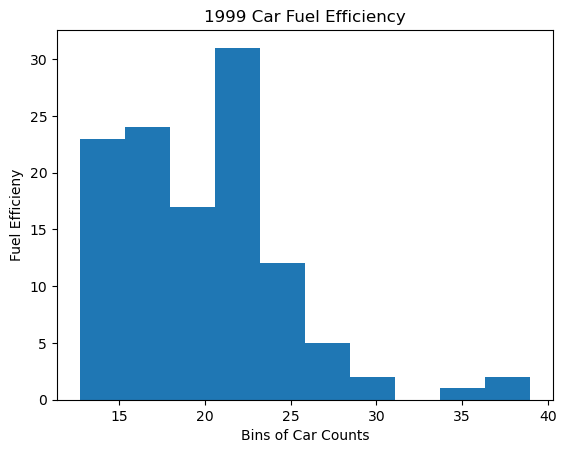

In [45]:
plt.hist(old_cars)
plt.xlabel('Bins of Car Counts')
plt.ylabel('Fuel Efficieny')
plt.title('1999 Car Fuel Efficiency')
plt.show()

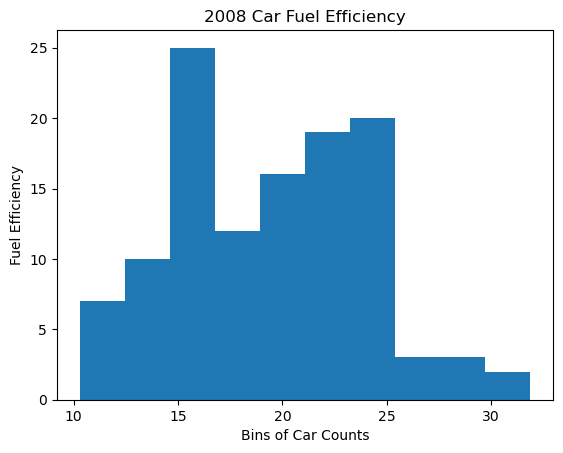

In [46]:
plt.hist(newer_cars)
plt.xlabel('Bins of Car Counts')
plt.ylabel('Fuel Efficiency')
plt.title('2008 Car Fuel Efficiency')
plt.show()

In [47]:
# STEP 2: Set Hypotheses

# Ho: There is not a difference in the fuel-efficiency in cars
# from 2008 vs 1999

# Ha: There is a difference in the fuel-efficiency in cars
# from 2008 vs 1999

In [48]:
# STEP 3: Set the alpha

α = 0.05

In [49]:
# STEP 4: Verify assumptions

# Independent: YES!

# Normality: at least 30 observations, YES!

# Variance: Lets check!

In [50]:
sub_α = 0.05

# sub_Ho: average mileage between 1999 and 2008 cars have
# equal variance.
# sub_Ha: average mileage between 1999 and 2008 cars have
# inequal variance.

In [51]:
stat, sub_p = stats.levene(old_cars, newer_cars)

In [52]:
sub_p < α

# the levene p is not less than alpha so we cannot reject the Ho
# We can say now that the two distributions have equal variance

# Variance: YES!

# and can therefore move on to our t-test

False

In [53]:
# STEP 5: Compute Test Statistic

t_stat, p_val = stats.ttest_ind(old_cars, 
                                newer_cars,
                                equal_var=True)

In [54]:
# STEP 6: Decide

# Two-tailed so we must check that p < alpha = we can reject the Ho

p_val < α

False

In [55]:
# Because the p_value is NOT less than alpha, we cannot reject the
# null hypothesis

# Ho: There is not a difference in the fuel-efficiency in cars
# from 2008 vs 1999

#### Are compact cars more fuel-efficient than the average car?

In [56]:
# Lets form our hypothesis:

# Ho: Compact cars are less or equally fuel efficient than the 
# average car (fe <= avg_fe)

# Ha: Compact cars are more fuel_efficient than the average car 
# (fe > avg_fe)

In [57]:
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [58]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [59]:
μ_overall = mpg['fe'].mean()

In [60]:
compact_cars = mpg[mpg['class'] == 'compact'].fe

In [61]:
α = 0.05

In [62]:
t_stat, p_val = stats.ttest_1samp(compact_cars, μ_overall)

In [63]:
if ((p_val / 2) and (t_stat > 0)):
    print('We can reject the Null Hypothesis!')
    print('There is evidence that the alternative hypothesis is true')
else:
    print('We fail to reject the Null Hypothesis')

We can reject the Null Hypothesis!
There is evidence that the alternative hypothesis is true


In [64]:
# Ha: Compact cars are more fuel_efficient than the average car

#### Do manual cars get better gas mileage than automatic cars?

In [65]:
# H0:  Manual cars have worse or equal gas mielage to automatic

# Ha: Manual cars have better gas mielage than automatic

In [66]:
# two samples: auto and manual
# greater than/less than: one_sided
# stats.ttest_ind

In [67]:
manual_fe = mpg[mpg.trans.str.startswith('man')].fe
auto_fe = mpg[mpg.trans.str.startswith('auto')].fe

In [68]:
stats.levene(manual_fe, auto_fe)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [69]:
# fail to reject Ho: presume that variance is equal

In [70]:
t_stat, p_val = stats.ttest_ind(auto_fe, manual_fe)

In [71]:
p_val

5.510464610044009e-06

In [72]:
# p_val is less than our alpha

In [73]:
t_stat

-4.652577547151351

In [74]:
# t_stat > 0:

In [75]:
# we met both conditions so we can reject Ho and say that there
# is a difference

# Ha: Manual cars receive better gas mileage than automatic vehicles

# Correlation

In [76]:
# vectorized operations and numerical calcs
import numpy as np
# tabular data window dressing and syntax
import pandas as pd
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# data cource
from pydataset import data
import scipy.stats as stats

In [77]:
swiss = data('swiss')

In [78]:
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


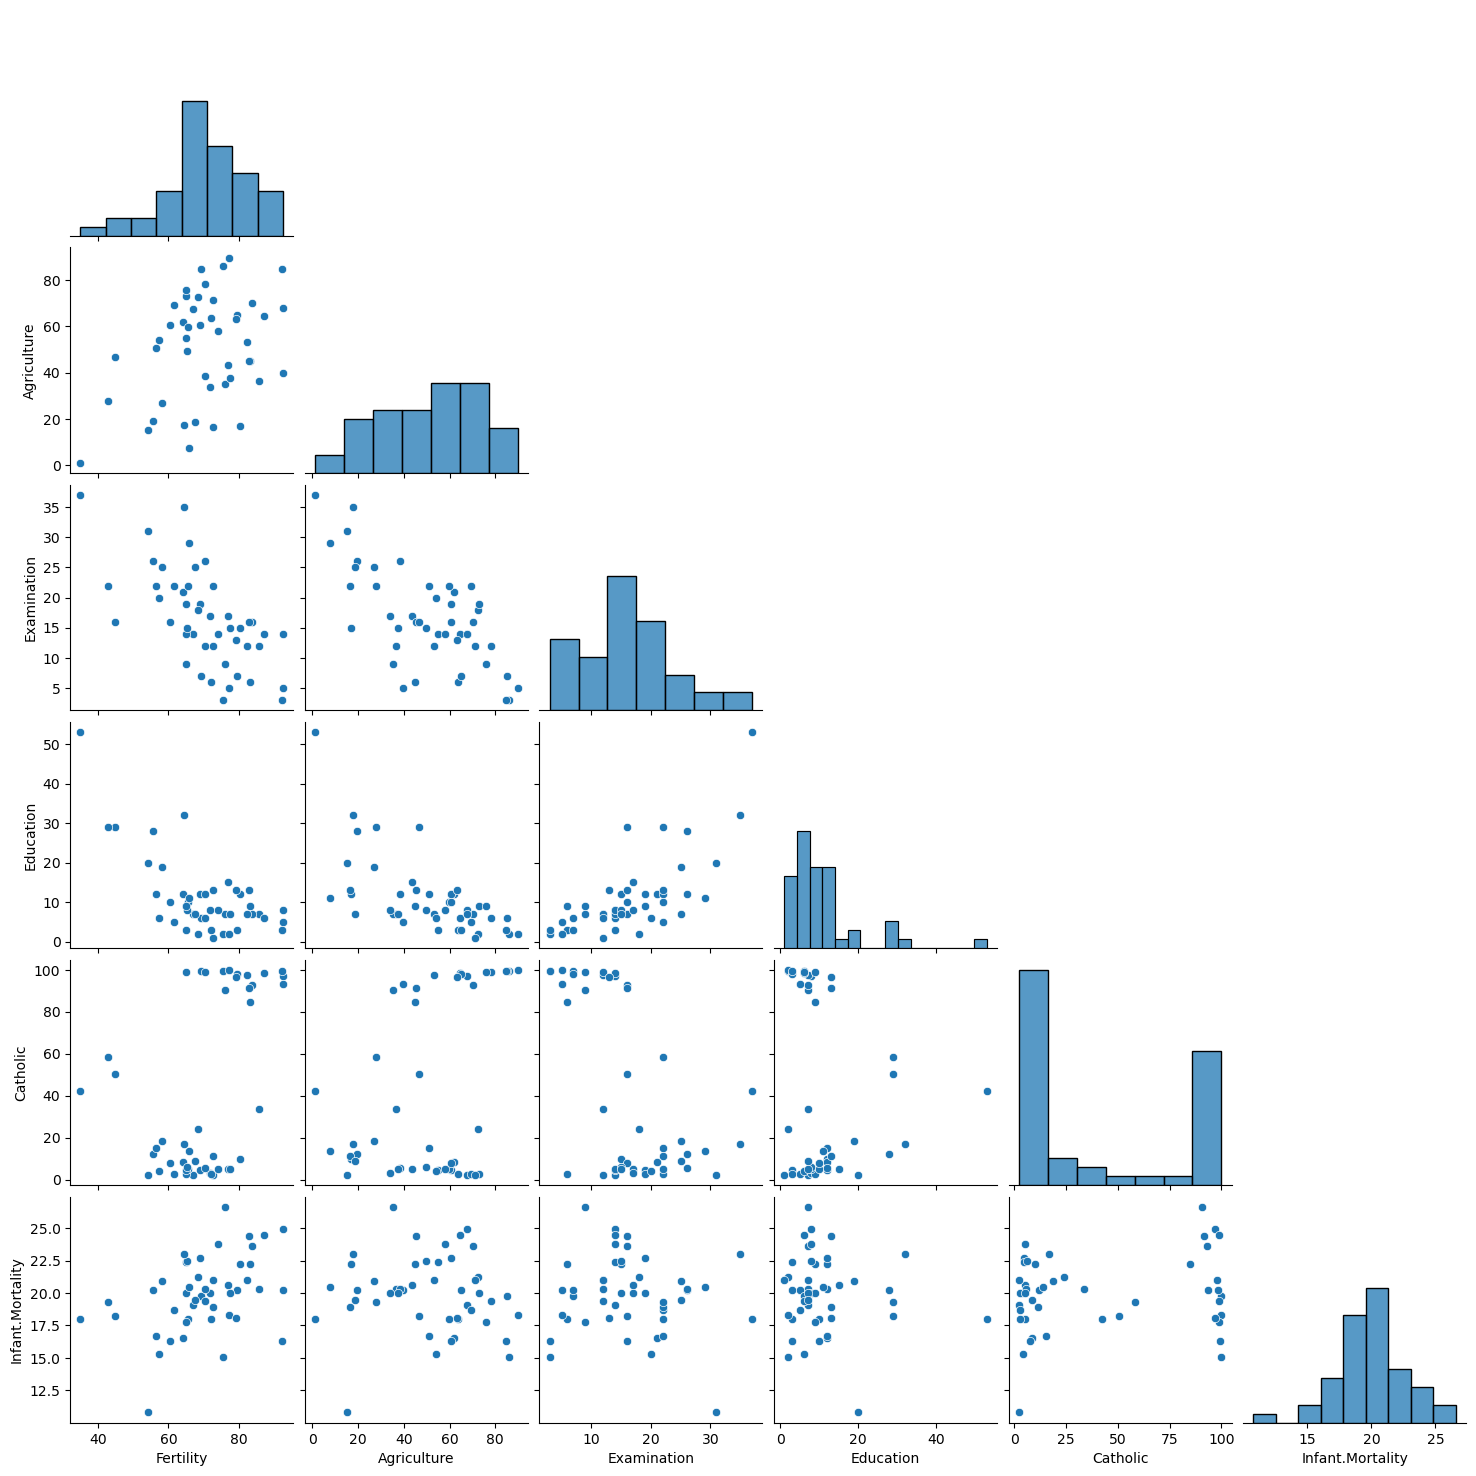

In [79]:
sns.pairplot(swiss, corner = True)

In [80]:
# lets look at agriculture vs examination
# and fertility vs examination

H$_0$: There is NO linear relationship between fertility and examination

H$_A$: There is a linear relationship between fertility and examination

In [81]:
fertility = swiss.Fertility

In [82]:
examination = swiss.Examination

In [83]:
corr, p = stats.pearsonr(fertility, examination)

In [84]:
corr

-0.6458827064572875

In [85]:
p

9.450437340690438e-07

In [86]:
α = 0.05
# confidence level = 95%

In [87]:
if p < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


In [88]:
agriculture = swiss.Agriculture

In [89]:
examination = swiss.Examination

H$_O$: There is NO linear relationship between agriculture and examination

H$_A$: There is a linear relationship between agriculture and examination

In [90]:
corr, p = stats.pearsonr(agriculture, examination)

In [91]:
corr

-0.6865422086171364

In [92]:
p

9.951515271339796e-08

In [93]:
α = 0.05

In [94]:
if p < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


H$_A$: There is a linear relationship between agriculture and examination

# Chi-Squared Testing of Categorical Information

In [95]:
mpg = data('mpg')

In [96]:
# when want to see if there is independence between two categorical
# variables

In [97]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [98]:
# lets look at 

In [99]:
pd.crosstab(mpg['year'], mpg['class'])

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
year,,,,,,,
1999,2,25,20,6,16,19,29
2008,3,22,21,5,17,16,33


In [100]:
mpg['auto_trans'] = mpg.trans.str.startswith('auto').astype(int)

In [101]:
pd.crosstab(mpg['year'], mpg['auto_trans'])

auto_trans,0,1
year,,
1999,43,74
2008,34,83


In [102]:
observed = pd.crosstab(mpg['year'], mpg['auto_trans'])

In [103]:
# we will create a table of counted observed values to test for the 
# chi-squared stat and ther associated p value

H$_O$: The variables year and transmission are independent of each other.

H$_A$: There is a relationship/dependency between vehicles manufacture year and vehicle transmission type


In [104]:
α = 0.05

In [105]:
stats.chi2_contingency(observed)

# this function needs to be fed the cross tabular data 
# of the two variableyou are comparing

(1.2388121432707422,
 0.2657001056392438,
 1,
 array([[38.5, 78.5],
        [38.5, 78.5]]))

In [106]:
# We get back four things:
# 1) the t_stat
# 2) p value
# 3) degrees of freedom: equivalent to sample size minus 1
# 4) expected values: what the proportions would look like if
# the two vars were completely independent and evenly distributed

In [107]:
if p < α:
    print('We can reject our null hypothesis')
    print(f'We can say that with a p value of {p} that these two categories are not inpdendent')
else: 
    print('We cannot reject the null hypothesis')

We can reject our null hypothesis
We can say that with a p value of 9.951515271339796e-08 that these two categories are not inpdendent


# Correlation Exercises

### 1. Answer with the type of stats test you would use (assume normal distribution):

#### Is there a relationship between the length of your arm and the length of your foot?

In [108]:
# Length of arm: continuous
# Length of leg: continuous
# TWO CONTINUOUS VARIABLES

# We want to test for a relationship

# ANSWER: Pearson's Correlation Coefficient

#### Do guys and gals quit their jobs at the same rate?

In [109]:
# 2 variables
# Guys: 0 or 1
# Gals: 0 or 1 

# Chi-Squared Contingency Table Test

if p < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

# p < α --> True: we must reject the Null Hypothesis

We reject the null hypothesis


#### Does the length of time of the lecture correlate with a students grade?

In [110]:
# length of time: continuous
# students grade: continuous

# Pearson's Correlation Coefficient

if p < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

# p < α --> True: we must reject the Null Hypothesis

We reject the null hypothesis


In [111]:
import env

### 2. Use the telco_churn data.
Does tenure correlate with monthly charges?

In [112]:
url = env.get_db_url('telco_churn')

In [113]:
customers = pd.read_sql('select * from customers;', url)

In [114]:
customers.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


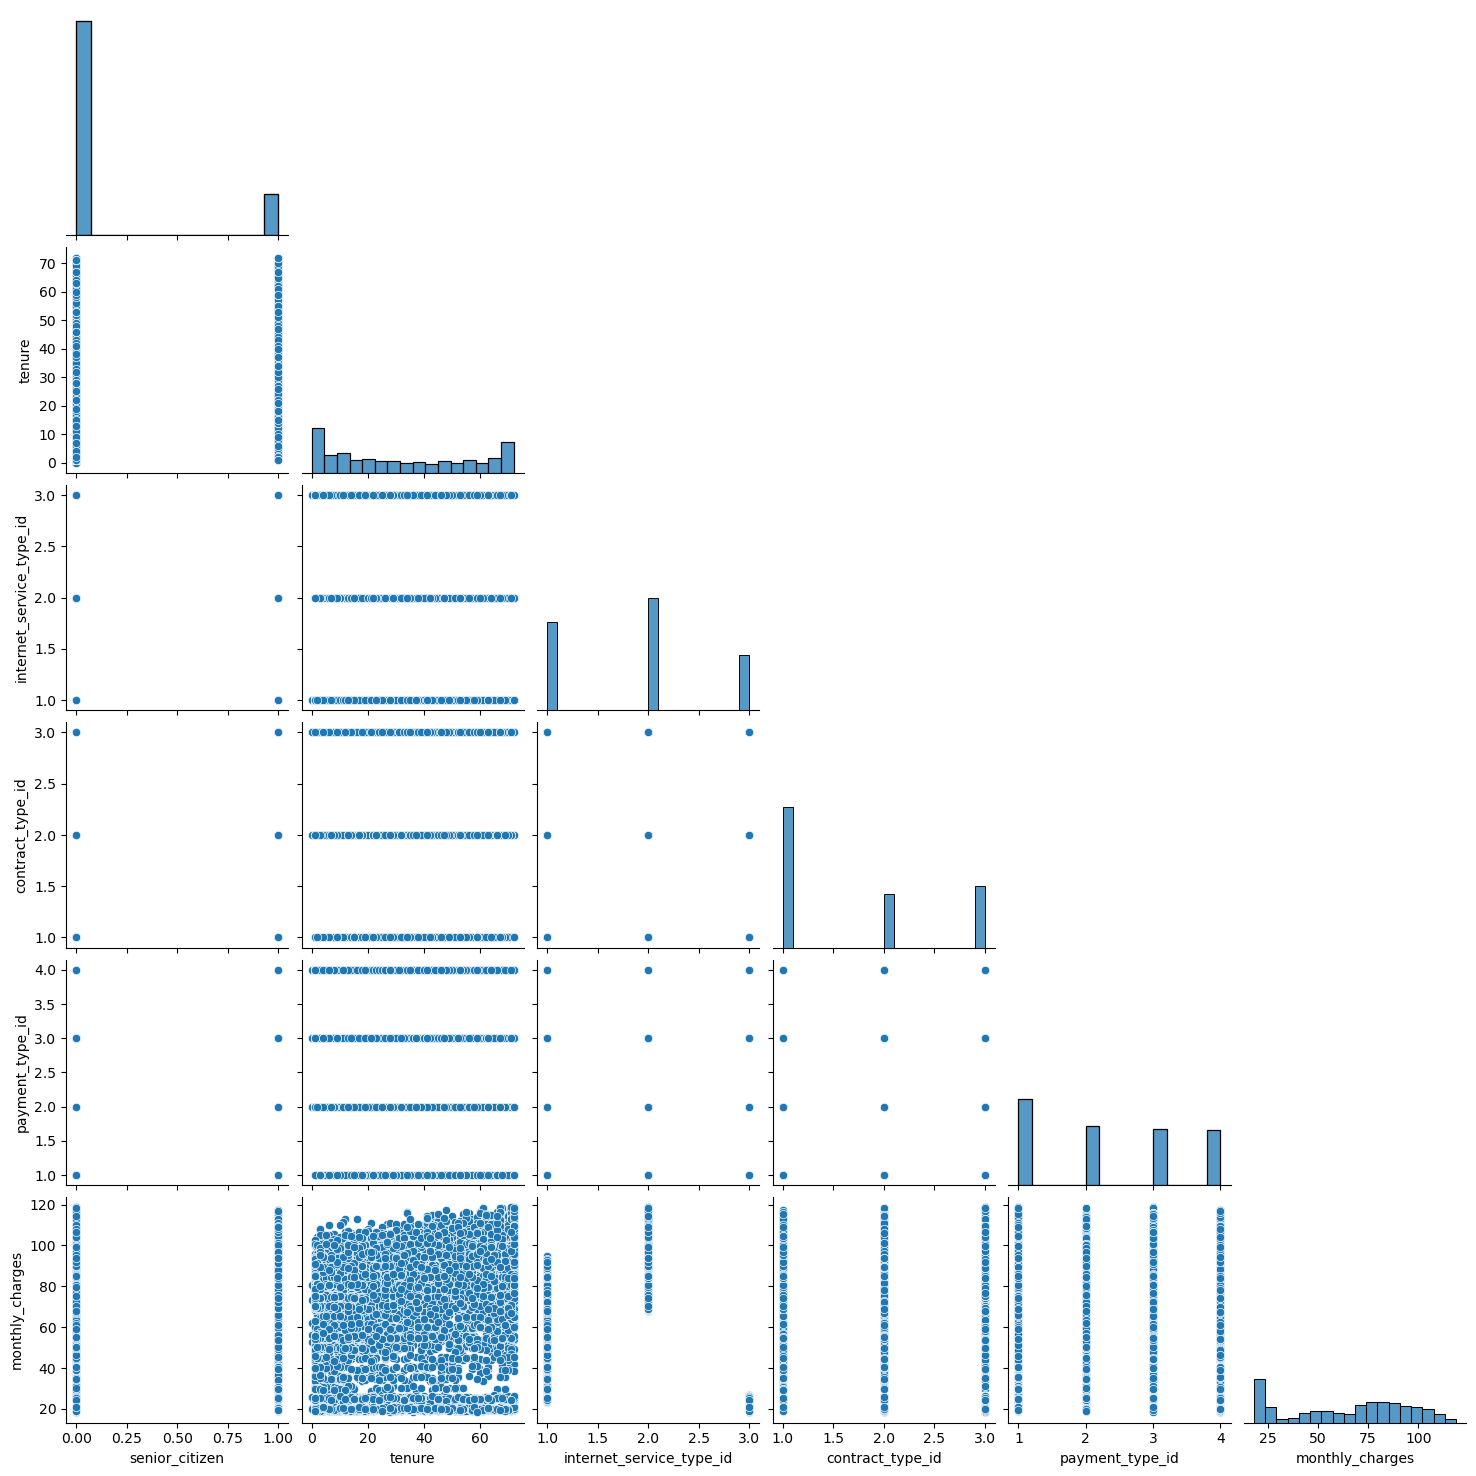

In [115]:
sns.pairplot(customers, corner = True)

In [116]:
customers['churned'] = customers['churn'].str.contains('Yes')

In [117]:
customers

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,churned
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,Yes,No,2,Yes,2,65.60,593.3,No,False
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,Yes,1,No,2,59.90,542.4,No,False
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,No,No,No,1,Yes,1,73.90,280.85,Yes,True
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes,True
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,Yes,No,No,2,No,2,55.15,742.9,No,False
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,Yes,1,Yes,1,85.10,1873.7,Yes,True
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,1,Yes,2,50.30,92.75,No,False
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,No,Yes,3,No,2,67.85,4627.65,No,False


H$_O$: There is no correlation between monthly charges and tenure.

H$_A$: There is a correlation between monthly charges and tenure. 

In [118]:
mo_charges = customers.monthly_charges

In [119]:
tenure = customers.tenure

In [120]:
corr, p = stats.pearsonr(mo_charges, tenure)

In [121]:
corr

0.24789985628615246

In [122]:
p

4.094044991483017e-99

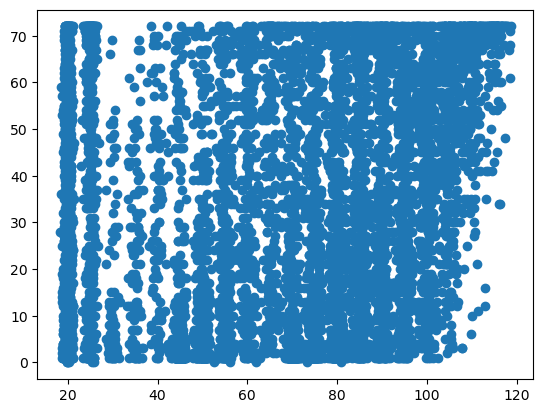

In [123]:
plt.scatter(mo_charges, tenure)
plt.show()

In [124]:
α = 0.05

In [125]:
if p < α:
    print('We must reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis')

We must reject the null hypothesis


Total charges?

In [126]:
tenure = customers.tenure

In [127]:
tenure.dtype

dtype('int64')

In [128]:
customers[customers.total_charges.str.contains(' ')]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,churned
945,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,1,Yes,...,Yes,Yes,No,3,No,4,56.05,,No,False
1731,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,3,No,2,20.00,,No,False
1906,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,1,Yes,...,Yes,No,No,3,Yes,3,61.90,,No,False
2025,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,2,Yes,2,19.70,,No,False
2176,3115-CZMZD,Male,0,No,Yes,0,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,3,No,2,20.25,,No,False
2250,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,3,No,2,25.35,,No,False
2855,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,1,No,...,Yes,Yes,No,3,No,2,73.35,,No,False
3052,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,3,No,2,25.75,,No,False
3118,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,1,Yes,...,Yes,Yes,No,3,Yes,3,52.55,,No,False
4054,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,1,Yes,...,No,Yes,Yes,3,No,2,80.85,,No,False


In [129]:
customers.total_charges.str.strip()

0         593.3
1         542.4
2        280.85
3       1237.85
4         267.4
         ...   
7038      742.9
7039     1873.7
7040      92.75
7041    4627.65
7042     3707.6
Name: total_charges, Length: 7043, dtype: object

In [130]:
customers.total_charges = customers.total_charges.replace(' ', '0.0')

In [131]:
customers[customers.total_charges.str.contains(' ')]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,churned


In [132]:
total_charges = customers.total_charges.astype(float)

In [133]:
total_charges

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7043, dtype: float64

In [134]:
tenure

0        9
1        9
2        4
3       13
4        3
        ..
7038    13
7039    22
7040     2
7041    67
7042    63
Name: tenure, Length: 7043, dtype: int64

H$_O$: There is no correlation between tenure and total charges

H$_A$: There is correlation between tenure and total charges

In [135]:
corr, p = stats.pearsonr(total_charges, tenure)

In [136]:
corr

0.8261783979502481

In [137]:
p

0.0

In [138]:
if p < α:
    print('We must reject the null hypothesis')
    print('We cannot say with certainty that no correlation between tenure and total charges exists. ')
else:
    print('We cannot reject the null hypothesis')

We must reject the null hypothesis
We cannot say with certainty that no correlation between tenure and total charges exists. 


What happens if you control for phone and internet service?

In [139]:
cust_phone = customers[customers['phone_service'] == 'Yes']

In [140]:
customers

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,churned
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,Yes,No,2,Yes,2,65.60,593.3,No,False
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,Yes,1,No,2,59.90,542.4,No,False
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,No,No,No,1,Yes,1,73.90,280.85,Yes,True
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes,True
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,Yes,No,No,2,No,2,55.15,742.9,No,False
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,Yes,1,Yes,1,85.10,1873.7,Yes,True
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,1,Yes,2,50.30,92.75,No,False
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,No,Yes,3,No,2,67.85,4627.65,No,False


In [141]:
int_types = pd.read_sql('select * from internet_service_types;', url)

In [142]:
int_types

,internet_service_type_id,internet_service_type
0,1,DSL
1,2,Fiber optic
2,3,None


In [143]:
cust_int_df = pd.merge(int_types, customers, how='outer', on='internet_service_type_id')

In [144]:
cust_int_df.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [145]:
phone_DSL = cust_int_df[(cust_int_df['phone_service'] == 'Yes') & (cust_int_df['internet_service_type'] == 'DSL')]

In [146]:
cust_int_df.total_charges = cust_int_df.total_charges.replace(' ', '0.0')

In [147]:
cust_int_df.total_charges = cust_int_df.total_charges.astype(float)

In [148]:
phone_DSL = cust_int_df[(cust_int_df['phone_service'] == 'Yes') & (cust_int_df['internet_service_type'] == 'DSL')]

In [149]:
phone_fo = cust_int_df[(cust_int_df['phone_service'] == 'Yes') & (cust_int_df['internet_service_type'] == 'Fiber optic')]

In [150]:
phone_no = cust_int_df[(cust_int_df['phone_service'] == 'Yes') & (cust_int_df['internet_service_type'] == 'None')]

In [151]:
nophone_DSL = cust_int_df[(cust_int_df['phone_service'] == 'No') & (cust_int_df['internet_service_type'] == 'DSL')]

In [152]:
nophone_fo = cust_int_df[(cust_int_df['phone_service'] == 'No') & (cust_int_df['internet_service_type'] == 'Fiber optic')]

In [153]:
nophone_no = cust_int_df[(cust_int_df['phone_service'] == 'No') & (cust_int_df['internet_service_type'] == 'None')]

In [154]:
# Tenure and total charges for DSL and Yes phone service

In [155]:
phone_DSL_corr, phone_DSL_p = stats.pearsonr(phone_DSL.tenure, phone_DSL.total_charges)

In [156]:
phone_fo_corr, phone_fo_p = stats.pearsonr(phone_fo.tenure, phone_fo.total_charges)

In [157]:
phone_no_corr, phone_no_p = stats.pearsonr(phone_no.tenure, phone_no.total_charges)

In [158]:
nophone_DSL_corr, nophone_DSL_p = stats.pearsonr(nophone_DSL.tenure, nophone_DSL.total_charges)

In [159]:
print(f'For those with phone service: \n')
print(f'The DSL corr is {phone_DSL_corr} and the DSL p value is {phone_DSL_p}.\n')
print(f'The Fiber Optic corr is {phone_fo_corr} and the Fiber Optic p value is {phone_fo_p}.\n')
print(f'For those who do not have internet service, the corr is {phone_no_corr} and the p value is {phone_no_p}.\n\n')
print(f'For those who do NOT have phone service: \n')
print(f'The DSL corr is {nophone_DSL_corr} and the DSL p value is {nophone_DSL_p}.\n')
print(f'There are no accounts for customers who do not have phone service and pay for Fiber Optic internet.\n')
print(f'There are no accounts for customers who do not have phone service and also do not pay for internet service')

For those with phone service: 

The DSL corr is 0.9705931617494685 and the DSL p value is 0.0.

The Fiber Optic corr is 0.9853093528070621 and the Fiber Optic p value is 0.0.

For those who do not have internet service, the corr is 0.9815669784401064 and the p value is 0.0.


For those who do NOT have phone service: 

The DSL corr is 0.9535697728407466 and the DSL p value is 0.0.

There are no accounts for customers who do not have phone service and pay for Fiber Optic internet.

There are no accounts for customers who do not have phone service and also do not pay for internet service


In [160]:
print(f'Compare this to the corr of the larger DB where the corr was {corr} and the p value was {p}.')

Compare this to the corr of the larger DB where the corr was 0.8261783979502481 and the p value was 0.0.


In [161]:
print('In all of these tests, the p value was less than alpha.\n')
print('Therefore, we cannot say with certainty that no correlation between tenure and total charges exists in any of these circumstances.\n')
print('All of the Correlation Coefficients are relatively strong.')

In all of these tests, the p value was less than alpha.

Therefore, we cannot say with certainty that no correlation between tenure and total charges exists in any of these circumstances.

All of the Correlation Coefficients are relatively strong.


### 3. Use the employees database.

In [162]:
url = env.get_db_url('employees')

In [163]:
salaries = pd.read_sql('select * from salaries;', url)

In [164]:
titles = pd.read_sql('select * from titles;', url)

In [204]:
cur_salaries = salaries[(salaries['to_date'] >= pd.to_datetime('today').normalize())]

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [205]:
cur_salaries

,emp_no,salary,from_date,to_date
16,10001,88958,2002-06-22,9999-01-01
22,10002,72527,2001-08-02,9999-01-01
29,10003,43311,2001-12-01,9999-01-01
45,10004,74057,2001-11-27,9999-01-01
58,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
2844010,499995,52868,2002-06-01,9999-01-01
2844017,499996,69501,2002-05-12,9999-01-01
2844032,499997,83441,2001-08-26,9999-01-01
2844041,499998,55003,2001-12-25,9999-01-01


In [200]:
cur_salaries.dtypes

emp_no        int64
salary        int64
from_date    object
to_date      object
dtype: object

In [166]:
emp_df = pd.merge(titles, cur_salaries, how='right', on='emp_no')

In [167]:
emp_df

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,10001,Senior Engineer,1986-06-26,9999-01-01,88958,2002-06-22,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01,72527,2001-08-02,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01,43311,2001-12-01,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01,74057,2001-11-27,9999-01-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,74057,2001-11-27,9999-01-01
...,...,...,...,...,...,...,...
371238,499997,Engineer,1987-08-30,1992-08-29,83441,2001-08-26,9999-01-01
371239,499997,Senior Engineer,1992-08-29,9999-01-01,83441,2001-08-26,9999-01-01
371240,499998,Senior Staff,1998-12-27,9999-01-01,55003,2001-12-25,9999-01-01
371241,499998,Staff,1993-12-27,1998-12-27,55003,2001-12-25,9999-01-01


In [203]:
emp_df

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y,emp_duration
0,10001,Senior Engineer,1986-06-26,9999-01-01,88958,2002-06-22,9999-01-01,"2920672 days, 0:00:00"
1,10002,Staff,1996-08-03,9999-01-01,72527,2001-08-02,9999-01-01,"2920996 days, 0:00:00"
2,10003,Senior Engineer,1995-12-03,9999-01-01,43311,2001-12-01,9999-01-01,"2920875 days, 0:00:00"
3,10004,Engineer,1986-12-01,1995-12-01,74057,2001-11-27,9999-01-01,"2920879 days, 0:00:00"
4,10004,Senior Engineer,1995-12-01,9999-01-01,74057,2001-11-27,9999-01-01,"2920879 days, 0:00:00"
...,...,...,...,...,...,...,...,...
371238,499997,Engineer,1987-08-30,1992-08-29,83441,2001-08-26,9999-01-01,"2920972 days, 0:00:00"
371239,499997,Senior Engineer,1992-08-29,9999-01-01,83441,2001-08-26,9999-01-01,"2920972 days, 0:00:00"
371240,499998,Senior Staff,1998-12-27,9999-01-01,55003,2001-12-25,9999-01-01,"2920851 days, 0:00:00"
371241,499998,Staff,1993-12-27,1998-12-27,55003,2001-12-25,9999-01-01,"2920851 days, 0:00:00"


In [168]:
emp_df['emp_duration'] = emp_df.to_date_y - emp_df.from_date_y

In [169]:
emp_df

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y,emp_duration
0,10001,Senior Engineer,1986-06-26,9999-01-01,88958,2002-06-22,9999-01-01,"2920672 days, 0:00:00"
1,10002,Staff,1996-08-03,9999-01-01,72527,2001-08-02,9999-01-01,"2920996 days, 0:00:00"
2,10003,Senior Engineer,1995-12-03,9999-01-01,43311,2001-12-01,9999-01-01,"2920875 days, 0:00:00"
3,10004,Engineer,1986-12-01,1995-12-01,74057,2001-11-27,9999-01-01,"2920879 days, 0:00:00"
4,10004,Senior Engineer,1995-12-01,9999-01-01,74057,2001-11-27,9999-01-01,"2920879 days, 0:00:00"
...,...,...,...,...,...,...,...,...
371238,499997,Engineer,1987-08-30,1992-08-29,83441,2001-08-26,9999-01-01,"2920972 days, 0:00:00"
371239,499997,Senior Engineer,1992-08-29,9999-01-01,83441,2001-08-26,9999-01-01,"2920972 days, 0:00:00"
371240,499998,Senior Staff,1998-12-27,9999-01-01,55003,2001-12-25,9999-01-01,"2920851 days, 0:00:00"
371241,499998,Staff,1993-12-27,1998-12-27,55003,2001-12-25,9999-01-01,"2920851 days, 0:00:00"


Is there a relationship between how long an employee has been with the company and their salary?

In [170]:
current_emp_df = emp_df[(emp_df['to_date_y'] >= pd.to_datetime('today').normalize())]

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [171]:
current_emp_df = current_emp_df.sort_values(by = 'to_date_y')

In [172]:
len(current_emp_df)

371243

In [173]:
len(emp_df)

371243

In [174]:
current_emp_df.emp_duration = current_emp_df.emp_duration.astype(str)

In [175]:
current_emp_df.emp_duration = current_emp_df.emp_duration.str.strip(' days, 0:00:00')

In [176]:
current_emp_df['emp_duration'] = current_emp_df['emp_duration'].replace(' ', '0.0')

In [177]:
current_emp_df.dtypes

emp_no           int64
title           object
from_date_x     object
to_date_x       object
salary           int64
from_date_y     object
to_date_y       object
emp_duration    object
dtype: object

In [178]:
current_emp_df[current_emp_df.emp_duration.str.isdigit() == False]

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y,emp_duration


In [179]:
current_emp_df[current_emp_df.emp_duration == '']

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y,emp_duration


In [180]:
current_emp_df.emp_duration = current_emp_df.emp_duration.replace('0.0', '0')

In [181]:
current_emp_df.emp_duration = current_emp_df.emp_duration.astype(int)

In [182]:
emp_tenure = current_emp_df.groupby('emp_no').emp_duration.sum()

In [183]:
emp_salary = current_emp_df.groupby('emp_no').salary.max()

H$_O$: There is no correlation between salary and how long an employee has been with the company. 

H$_A$: There is a correlation between salary and how long as employee has been with the company.

In [184]:
corr, p = stats.pearsonr(emp_salary, emp_tenure)

In [185]:
corr

0.20148542702426803

In [186]:
p

0.0

In [187]:
α = 0.05

In [188]:
if p < α:
    print('The p value is indeed less than the alpha, so we must reject the null hypothesis.')
else:
    print('The p value was equal to or more than the alpha, and thus we fail to reject the null hypothesis.')

The p value is indeed less than the alpha, so we must reject the null hypothesis.


Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [189]:
emp_titles = current_emp_df.groupby('emp_no').title.count()

H$_O$: There is no correlation between the number of titles and how long an employee has been with the company. 

H$_A$: There is a correlation between the number of titles and how long as employee has been with the company.

In [190]:
corr, p = stats.pearsonr(emp_titles, emp_tenure)

In [191]:
print(corr)
p

0.7324920068342495


0.0

In [192]:
if p < α:
    print('The p value is indeed less than the alpha, so we must reject the null hypothesis.')
else:
    print('The p value was equal to or more than the alpha, and thus we fail to reject the null hypothesis.')

The p value is indeed less than the alpha, so we must reject the null hypothesis.


### 4. Use the sleepstudy data.

Is there a relationship between days and reaction time?

In [193]:
sleepstudy = data('sleepstudy')

In [194]:
sleepstudy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


H$_O$: There is no correlation between days and reaction time.

H$_A$: There is a correlation between days and reaction time.

In [195]:
corr, p = stats.pearsonr(sleepstudy.Days, sleepstudy.Reaction)

In [196]:
corr

0.5352302262650255

In [197]:
p

9.89409632221439e-15

In [198]:
if p < α:
    print('The p value is indeed less than the alpha, so we must reject the null hypothesis.')
else:
    print('The p value was equal to or more than the alpha, and thus we fail to reject the null hypothesis.')

The p value is indeed less than the alpha, so we must reject the null hypothesis.


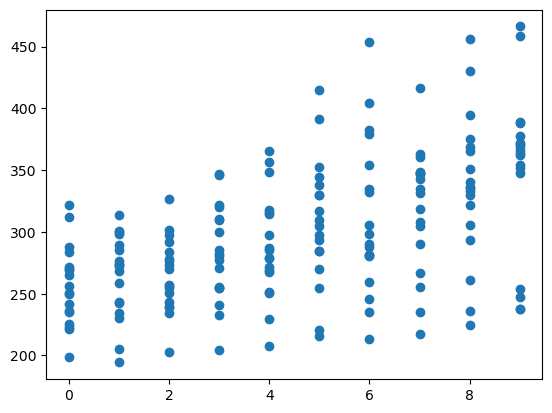

In [199]:
plt.scatter(sleepstudy.Days, sleepstudy.Reaction)
plt.show()

# Comparison of Groups Exercises

### The Chi-Square Contingency Table Test

#### 1. Answer with the type of stats test you would use (assume normal distribution):

- Do students get better test grades if they have a rubber duck on their desk?
    t-test, one tailed: comparing the mean test grades between two independent samples (duck and no duck)
- Does smoking affect when or not someone has lung cancer?
    Chi^2: two categories 1) lung cancer yes or no and 2) smoker yes or no
- Is gender independent of a person’s blood type?
    Chi^2: two categories 1) gender 2) blood type
- A farming company wants to know if a new fertilizer has improved crop yield or not
    t-test, one tailed: comparing the mean of two independant samples (new fertilizer crop yeild vs no fertilizer crop yeild
- Does the length of time of the lecture correlate with a students grade?
    2 continuous variables: Pearson's Correlation coefficient
- Do people with dogs live in apartments more than people with cats?
    Chi^2: 2 categories: 1) apartment yes or no, 2) dog or cat

#### 2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [206]:
observed = pd.DataFrame(
    {
        'codeup_student': [49, 1],
        'not_codeup_student': [1, 30]
    }, index=['macbook_user', 'not_macbook_user']
)

In [207]:
observed

,codeup_student,not_codeup_student
macbook_user,49,1
not_macbook_user,1,30


H$_O$: There is no dependence between being a codeup student and using a macbook.

H$_A$: There is a dependence between being a codeup student and using a macbook. 

In [208]:
chi2, p, _, expected = stats.chi2_contingency(observed)

In [210]:
chi2

68.79899781477629

In [211]:
p

1.09028085145229e-16

In [212]:
α = 0.05

In [213]:
p < α

True

We reject the null hypothsis

In [214]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,auto_trans
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,1
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,1
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,1
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,1
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,1
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,0


In [219]:
observed = pd.crosstab(mpg['drv'], mpg['year'])

In [220]:
observed

year,1999,2008
drv,,
4,49,54
f,57,49
r,11,14


In [ ]:
# HO: Drive and Year are independent of each other
# HA: Drive and year are dependent of each other

In [221]:
chi2, p, _, expected = stats.chi2_contingency(observed)
if p < α:
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


#### 4. Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [223]:
query = '''
        select emp_no, gender, dept_name
        from employees
            join dept_emp
                using (emp_no)
            join departments
                using (dept_no)
        where to_date = '9999-01-01'
        and dept_name in ('Marketing', 'Sales')
        '''
gender_dept = pd.read_sql(query, url)

In [225]:
observed = pd.crosstab(gender_dept.gender, gender_dept.dept_name)

In [ ]:
# HO: Gender and department are independent of each other

# HA: Gender and department are dependent of each other

In [226]:
chi2, p, _, expected = stats.chi2_contingency(observed)

In [227]:
if p < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


Is an employee's gender independent of whether or not they are or have been a manager?

In [230]:
query = '''
        select emp_no, gender, dept_no
        from employees
            left join dept_manager
                using (emp_no)
        '''
gender_managers = pd.read_sql(query, url)

In [231]:
gender_managers.dept_no.value_counts()

d004    4
d006    4
d009    4
d001    2
d002    2
d003    2
d005    2
d007    2
d008    2
Name: dept_no, dtype: int64

In [233]:
gender_managers['manager'] = gender_managers.dept_no.fillna('no').str.startswith('d').astype(int)

In [234]:
gender_managers.manager.value_counts()

0    300000
1        24
Name: manager, dtype: int64

In [ ]:
# HO: Gender and holding a managerial position are independent of each other

#HA: Gender and holding a managerial position are dependent of each other

In [235]:
observed = pd.crosstab(gender_managers.gender, gender_managers.manager)

In [236]:
chi2, p, _, expected = stats.chi2_contingency(observed)
if p < α:
    print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis
